In [ ]:
from importlib import reload

import numpy as np
from matplotlib import pyplot as plt

import L96
import relax_punch

reload(L96)
reload(relax_punch)

ndarray = np.ndarray

In [ ]:
def plot_param_updates(rp, γ1, γ2):
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))

    ax = axs[0]
    ax.plot(np.full_like(rp.c1s, γ1), label="$\gamma_1$")
    ax.plot(rp.c1s, label="$c_1$")

    # Use symlog y-scale if any c1 value is negative, and plot -γ1.
    if any(rp.c1s < 0):
        ax.plot(np.full_like(rp.c1s, -γ1), label="$-\gamma_1$")
        ax.set_yscale("symlog")
    else:
        ax.set_yscale("log")

    ax.legend()
    ax.set_xlabel("iteration number")
    ax.set_title("$\gamma_1$ vs $c_1$")

    ax = axs[1]
    ax.plot(np.full_like(rp.c2s, γ2), label="$\gamma_2$")
    ax.plot(rp.c2s, label="$c_2$")
    ax.set_yscale("log")

    ax.legend()
    ax.set_xlabel("iteration number")
    ax.set_title("$\gamma_2$ vs $c_2$")

    ax = axs[2]
    diff = np.stack((rp.c1s, rp.c2s)) - np.array((γ1, γ2)).reshape((-1, 1))
    error = np.linalg.norm(diff, axis=0)
    rel_error = error / np.linalg.norm(np.array((γ1, γ2)))

    ax.plot(error, color="cyan", label="Absolute error")
    ax.plot(rel_error, color="green", label="Relative error")

    ax.legend()
    ax.set_xlabel("iteration number")
    ax.set_title("Error")

    fig.tight_layout()
    plt.show()

# Run gradient descent starting with correct parameters

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
Δt = 50
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1, γ2
ds = np.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 50

rp = relax_punch.RelaxPunch(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)

# Initial true state
init = np.random.default_rng(42).uniform(size=I + I * J)
U0 = init[:I]
V0 = init[I:]

# Initial simulation state
U0_sim = np.zeros_like(U0)
V0_sim = np.zeros_like(V0)

num_iters = 10
learning_rate = 20

T = num_iters * Δt

options = {
    "method": "RK45",
    "rtol": 1e-5,
    "first_step": 1e-3,
}
rp.iterate(
    Δt,
    num_iters,
    learning_rate,
    U0,
    V0,
    U0_sim,
    V0_sim,
    options,
    rp._gradient_descent,
)

In [ ]:
tn = 2000
tls = np.linspace(0, T, tn)

states = rp.sol(tls)
Us, Vs = zip(*(L96.apart(state, I, J) for state in states.T))
Us, Vs = np.stack(Us), np.stack(Vs)

states_sim = rp.sim(tls)
Us_sim, Vs_sim = zip(*(L96.apart(state, I, J_sim) for state in states_sim.T))
Us_sim, Vs_sim = np.stack(Us_sim), np.stack(Vs_sim)

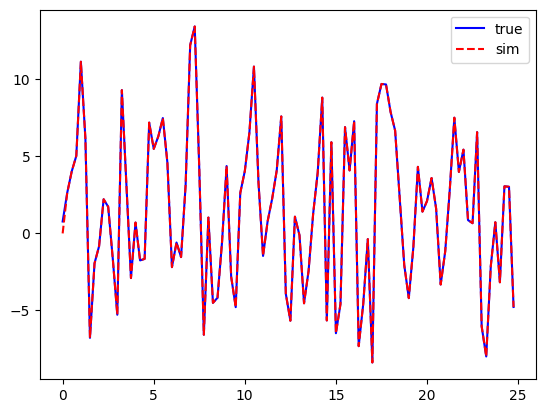

In [ ]:
s = np.s_[:100]

fig, ax = plt.subplots(1, 1)

i = 0
ax.plot(tls[s], Us.T[i, s], label="true", color="blue")
ax.plot(tls[s], Us_sim.T[i, s], label="sim", color="red", linestyle="--")

ax.legend()
plt.show()

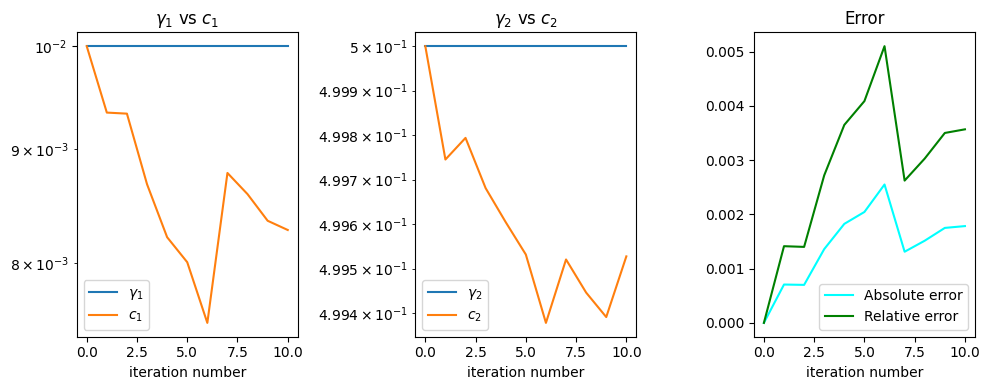

In [ ]:
plot_param_updates(rp, γ1, γ2)

## Try updating parameters

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
Δt = 50
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1 / 2, γ2 / 2
ds = np.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 50

rp = relax_punch.RelaxPunch(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)

# Initial true state
init = np.random.default_rng(42).uniform(size=I + I * J)
U0 = init[:I]
V0 = init[I:]

# Initial simulation state
U0_sim = np.zeros_like(U0)
V0_sim = np.zeros_like(V0)

num_iters = 10
learning_rate = 20

T = num_iters * Δt

options = {
    "method": "RK45",
    "rtol": 1e-5,
    "first_step": 1e-3,
}
rp.iterate(
    Δt,
    num_iters,
    learning_rate,
    U0,
    V0,
    U0_sim,
    V0_sim,
    options,
    rp._gradient_descent,
)

In [ ]:
tn = 2000
tls = np.linspace(0, T, tn)

states = rp.sol(tls)
Us, Vs = zip(*(L96.apart(state, I, J) for state in states.T))
Us, Vs = np.stack(Us), np.stack(Vs)

states_sim = rp.sim(tls)
Us_sim, Vs_sim = zip(*(L96.apart(state, I, J_sim) for state in states_sim.T))
Us_sim, Vs_sim = np.stack(Us_sim), np.stack(Vs_sim)

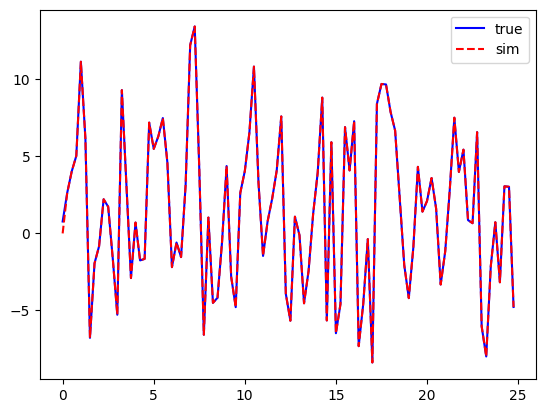

In [ ]:
s = np.s_[:100]

fig, ax = plt.subplots(1, 1)

i = 0
ax.plot(tls[s], Us.T[i, s], label="true", color="blue")
ax.plot(tls[s], Us_sim.T[i, s], label="sim", color="red", linestyle="--")

ax.legend()
plt.show()

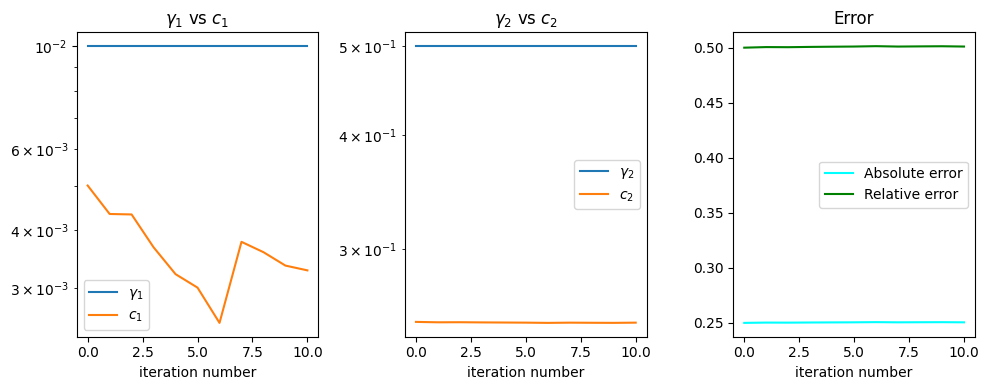

In [ ]:
plot_param_updates(rp, γ1, γ2)

# Levenberg–Marquardt starting with correct parameters

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
Δt = 50
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1, γ2
ds = np.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 50

rp = relax_punch.RelaxPunch(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)

# Initial true state
init = np.random.default_rng(42).uniform(size=I + I * J)
U0 = init[:I]
V0 = init[I:]

# Initial simulation state
U0_sim = np.zeros_like(U0)
V0_sim = np.zeros_like(V0)

num_iters = 10
learning_rate = 20

T = num_iters * Δt

options = {
    "method": "RK45",
    "rtol": 1e-5,
    "first_step": 1e-3,
}
rp.iterate(
    Δt,
    num_iters,
    learning_rate,
    U0,
    V0,
    U0_sim,
    V0_sim,
    options,
    rp._levenberg_marquardt,
)

In [ ]:
tn = 2000
tls = np.linspace(0, T, tn)

states = rp.sol(tls)
Us, Vs = zip(*(L96.apart(state, I, J) for state in states.T))
Us, Vs = np.stack(Us), np.stack(Vs)

states_sim = rp.sim(tls)
Us_sim, Vs_sim = zip(*(L96.apart(state, I, J_sim) for state in states_sim.T))
Us_sim, Vs_sim = np.stack(Us_sim), np.stack(Vs_sim)

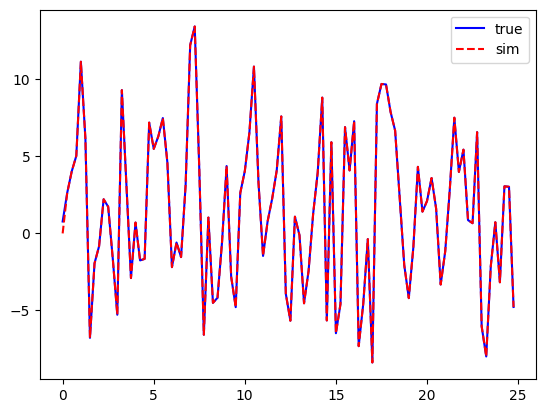

In [ ]:
s = np.s_[:100]

fig, ax = plt.subplots(1, 1)

i = 0
ax.plot(tls[s], Us.T[i, s], label="true", color="blue")
ax.plot(tls[s], Us_sim.T[i, s], label="sim", color="red", linestyle="--")

ax.legend()
plt.show()

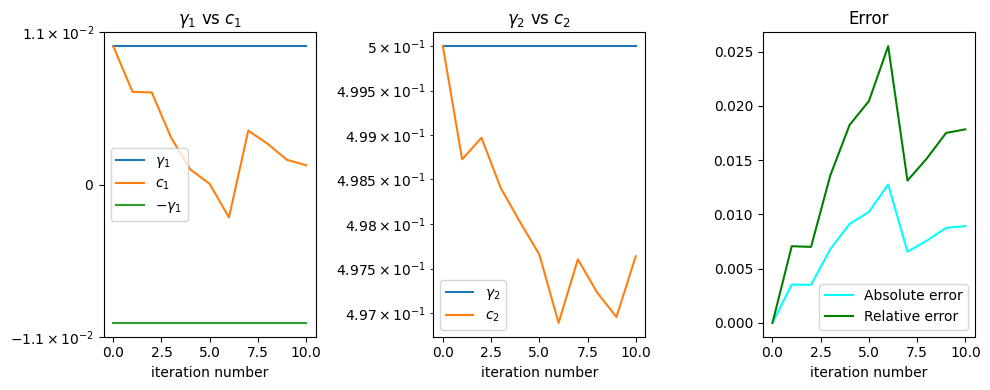

In [ ]:
plot_param_updates(rp, γ1, γ2)

## Try updating parameters

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
Δt = 50
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1 / 2, γ2 / 2
ds = np.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 50

rp = relax_punch.RelaxPunch(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)

# Initial true state
init = np.random.default_rng(42).uniform(size=I + I * J)
U0 = init[:I]
V0 = init[I:]

# Initial simulation state
U0_sim = np.zeros_like(U0)
V0_sim = np.zeros_like(V0)

num_iters = 10
learning_rate = 20

T = num_iters * Δt

options = {
    "method": "RK45",
    "rtol": 1e-5,
    "first_step": 1e-3,
}
rp.iterate(
    Δt,
    num_iters,
    learning_rate,
    U0,
    V0,
    U0_sim,
    V0_sim,
    options,
    rp._levenberg_marquardt,
)

In [ ]:
tn = 2000
tls = np.linspace(0, T, tn)

states = rp.sol(tls)
Us, Vs = zip(*(L96.apart(state, I, J) for state in states.T))
Us, Vs = np.stack(Us), np.stack(Vs)

states_sim = rp.sim(tls)
Us_sim, Vs_sim = zip(*(L96.apart(state, I, J_sim) for state in states_sim.T))
Us_sim, Vs_sim = np.stack(Us_sim), np.stack(Vs_sim)

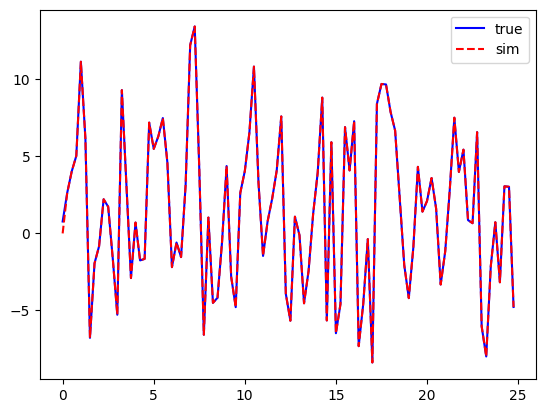

In [ ]:
s = np.s_[:100]

fig, ax = plt.subplots(1, 1)

i = 0
ax.plot(tls[s], Us.T[i, s], label="true", color="blue")
ax.plot(tls[s], Us_sim.T[i, s], label="sim", color="red", linestyle="--")

ax.legend()
plt.show()

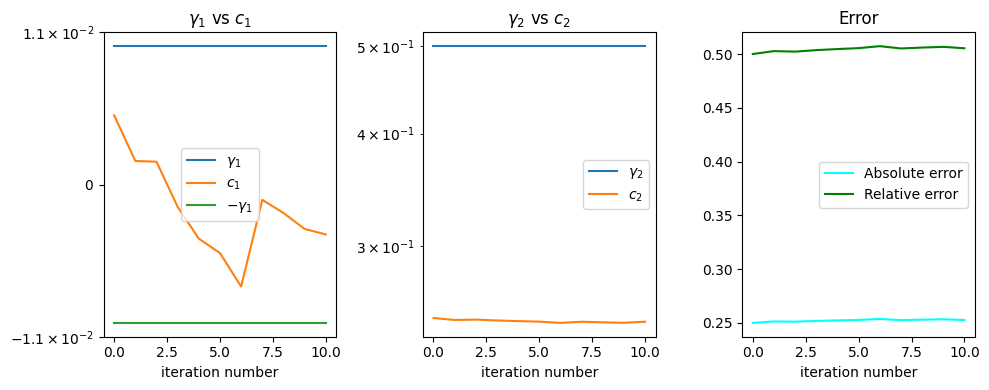

In [ ]:
plot_param_updates(rp, γ1, γ2)